In [2]:
import pandas as pd
import numpy as np
from helper import visualize_input, plot_images
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as normal
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Clasificador Naive Bayes para estimar el Género a partir de Alturas y Pesos

### Trabajo Práctico: Laboratorio de Probabilidad y Estadística en Python

#### María Laura Sarasola - Julio 2018

### Importamos dataset alturas y pesos

In [3]:
# Transformo mi archivo CSV en un pandas.DataFrame. Tabla con etiquetas en filas y columnas
df = pd.read_csv('alturas-pesos.csv')

### Exploramos datos en el dataset

In [4]:
alturas = df['Altura'].values
pesos = df['Peso'].values
clases = df['Sexo'].values

In [5]:
# Exploro datos en alturas
print("Chequeo básico de la lista 'alturas':")
print("La lista alturas contiene {} elementos, siendo el mínimo {} y el máximo: {}.".format(len(alturas),min(alturas),max(alturas)))
print("\nEl tipo de datos de la lista es {}, y el primer elemento es {}.".format(alturas.dtype,alturas[0]))
print("\nLista de alturas: ")
print(alturas)

Chequeo básico de la lista 'alturas':
La lista alturas contiene 10000 elementos, siendo el mínimo 137 y el máximo: 200.

El tipo de datos de la lista es int64, y el primer elemento es 187.

Lista de alturas: 
[187 174 188 ... 162 175 157]


In [6]:
# Exploro datos en pesos
print("Chequeo básico de la lista 'pesos':")
print("\nLa lista pesos contiene {} elementos, siendo el mínimo {} y el máximo: {}.".format(len(pesos),min(pesos),max(pesos)))
print("\nEl tipo de datos de la lista es {}, y el primer elemento es {}.".format(pesos.dtype,pesos[0]))
print("\nLista pesos: ")
print(pesos)

Chequeo básico de la lista 'pesos':

La lista pesos contiene 10000 elementos, siendo el mínimo 29 y el máximo: 122.

El tipo de datos de la lista es int64, y el primer elemento es 109.

Lista pesos: 
[109  73  96 ...  58  74  51]


In [7]:
print("Chequeo básico de la lista 'clases':")
#Chequeo cuántas clases hay en la lista
Clases_Filt = []
for i in clases:
    if i not in Clases_Filt:
        Clases_Filt.append(i)
print("\nLa lista clases contiene {} elementos, y cada registro de peso/altura se etiqueta solo como uno de las siguientes clases: {}.".format(len(clases),Clases_Filt))
print("\nCantidad de registros'Hombre'en la lista: ",(clases == 'Hombre').sum())
print("\nCantidad de registros'Mujer'en la lista: ",(clases == 'Mujer').sum())

Chequeo básico de la lista 'clases':

La lista clases contiene 10000 elementos, y cada registro de peso/altura se etiqueta solo como uno de las siguientes clases: ['Hombre', 'Mujer'].

Cantidad de registros'Hombre'en la lista:  5000

Cantidad de registros'Mujer'en la lista:  5000


In [8]:
# Visualizo primeras 5 filas del DataFrame
df.head()

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


In [9]:
# Exploro los tipos de dato inferidos
df.dtypes

Sexo      object
Peso       int64
Altura     int64
dtype: object

In [10]:
# Exploro dimensiones del set de datos
print("\nLas dimensiones del DataFrame son:",df.shape)


Las dimensiones del DataFrame son: (10000, 3)


### Graficamos Histogramas

A traves de los histogramas de alturas y pesos inferimos el tipo de ditribución que aplica a los datos.

In [11]:
# Defino una función para generar los parámetros del histograma, así como las medias y varianzas
def get_Dist_Prob_Data(lista):
    Hist = [] # Inicializo una lista para realizar el conteo de ocurrencias para cada elemento en la lista
    EspM = [] #Inicializo una lista para guardar las ocurrencias unicas del listado
    for e in lista:
        if e not in EspM:
            EspM.append(e)
    EspM.sort() #Ordeno la lista
    for e in EspM:
        Hist.append((lista == e).sum())
    mean=round(lista.mean(),2)
    var=round(lista.var(),2)
    return EspM, Hist, mean, var

In [12]:
# Separo los dataframes de Hombres y Mujeres
df_H = df.loc[df['Sexo'] == "Hombre"]
df_M = df.loc[df['Sexo'] == "Mujer"]


Las Mujeres registran alturas comprendidas entre 137 y 186, con media 161.32 y varianza 47.13.


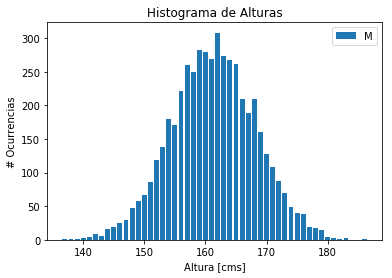


Los Hombres registran alturas comprendidas entre 148 y 200, con media 174.82 y varianza 52.85.


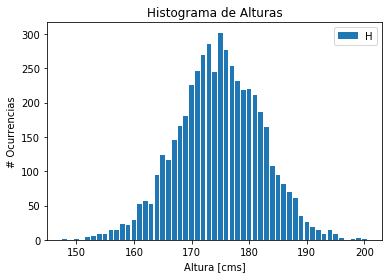

In [13]:
#Grafico Histogramas de Altura para hombres y mujeres
EspM_Alt_M, Hist_Alt_M, A_Mean_M, A_Var_M=get_Dist_Prob_Data(df_M['Altura'].values) # Datos Mujeres
EspM_Alt_H, Hist_Alt_H, A_Mean_H, A_Var_H=get_Dist_Prob_Data(df_H['Altura'].values) # Datos Hombres

print("\nLas Mujeres registran alturas comprendidas entre {} y {}, con media {} y varianza {}.".format(min(EspM_Alt_M),max(EspM_Alt_M), A_Mean_M, A_Var_M))
# Grafico el histograma de alturas para Mujeres
plt.bar(EspM_Alt_M, Hist_Alt_M)
plt.title('Histograma de Alturas')
plt.legend("Mujeres",loc='upper right')
plt.xlabel('Altura [cms]')
plt.ylabel('# Ocurrencias')
plt.show()

print("\nLos Hombres registran alturas comprendidas entre {} y {}, con media {} y varianza {}.".format(min(EspM_Alt_H),max(EspM_Alt_H), A_Mean_H, A_Var_H))
# Grafico el histograma de alturas para Mujeres
plt.bar(EspM_Alt_H, Hist_Alt_H)
plt.title('Histograma de Alturas')
plt.legend("Hombres",loc='upper right')
plt.xlabel('Altura [cms]')
plt.ylabel('# Ocurrencias')
plt.show()

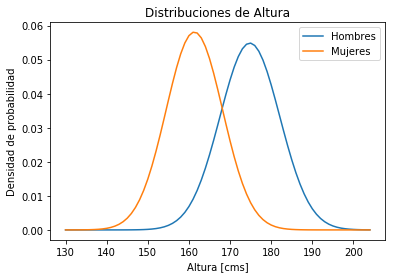

In [14]:
# Grafico densidades de alturas basadas en medias y varianzas calculadas
#Plot
x = np.arange(130,205)
plt.figure()
plt.plot(x,normal.pdf(x,A_Mean_H,A_Var_H),label='Hombres')
plt.plot(x,normal.pdf(x,A_Mean_M,A_Var_M),label='Mujeres')
plt.legend(loc='upper right')
plt.title('Distribuciones de Altura')
plt.xlabel('Altura [cms]')
plt.ylabel('Densidad de probabilidad')
plt.show()


Las Mujeres registran pesos comprendidos entre 29 y 91, con media 61.12 y varianza 74.52.


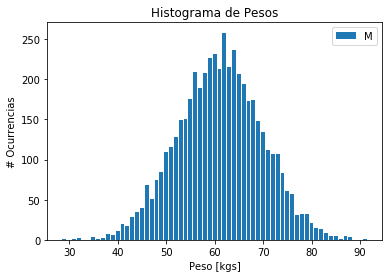


Los Hombres registran pesos comprendidas entre 51 y 122, con media 84.34 y varianza 80.6.


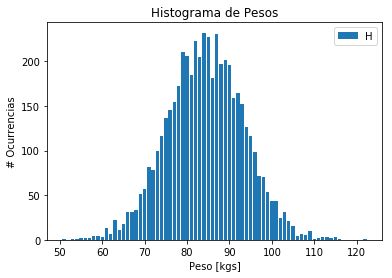

In [15]:
#Grafico Hitogramas de Peso para hombres y mujeres
EspM_Pso_M, Hist_Pso_M, P_Mean_M, P_Var_M=get_Dist_Prob_Data(df_M['Peso'].values) # Datos Mujeres
EspM_Pso_H, Hist_Pso_H, P_Mean_H, P_Var_H=get_Dist_Prob_Data(df_H['Peso'].values) # Datos Hombres

print("\nLas Mujeres registran pesos comprendidos entre {} y {}, con media {} y varianza {}.".format(min(EspM_Pso_M),max(EspM_Pso_M), P_Mean_M, P_Var_M))
# Grafico el histograma de alturas para Mujeres
plt.bar(EspM_Pso_M, Hist_Pso_M)
plt.title('Histograma de Pesos')
plt.legend("Mujeres",loc='upper right')
plt.xlabel('Peso [kgs]')
plt.ylabel('# Ocurrencias')
plt.show()

print("\nLos Hombres registran pesos comprendidas entre {} y {}, con media {} y varianza {}.".format(min(EspM_Pso_H),max(EspM_Pso_H), P_Mean_H, P_Var_H))
# Grafico el histograma de alturas para Mujeres
plt.bar(EspM_Pso_H, Hist_Pso_H)
plt.title('Histograma de Pesos')
plt.legend("Hombres",loc='upper right')
plt.xlabel('Peso [kgs]')
plt.ylabel('# Ocurrencias')
plt.show()

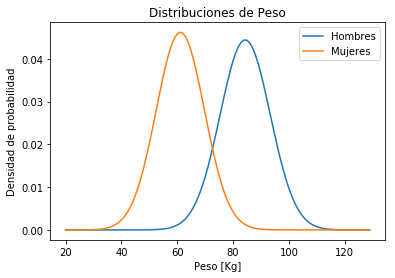

In [16]:
# Grafico densidades de pesos basadas en medias y varianzas calculadas
#Plot
x = np.arange(20,130)
plt.figure()
plt.plot(x,normal.pdf(x,P_Mean_H,P_Var_H),label='Hombres')
plt.plot(x,normal.pdf(x,P_Mean_M,P_Var_M),label='Mujeres')
plt.legend(loc='upper right')
plt.title('Distribuciones de Peso')
plt.xlabel('Peso [Kg]')
plt.ylabel('Densidad de probabilidad')
plt.show()


## Realizamos predicciones aplicando Naive Bayes

Dado una observación de Altura-Peso, estimo la probabilidad de ser Hombre o Mujer:

$$P(H|(altura=a,peso=p))=\frac{P(altura=a,peso=p| H).P(H)}{P(altura=a,peso=p)}$$

$$P(M|(altura=a,peso=p))=\frac{P(altura=a,peso=p| M).P(M)}{P(altura=a,peso=p)}$$

Asumiendo independencia, calcularemos los Likelihoods como:

$$P(P(altura=a,peso=p| H)=P(altura=a| H).P(peso=p| H)$$

$$P(P(altura=a,peso=p| M)=P(altura=a| M).P(peso=p| M)$$

#### Calculo Probabilidad a priori:

In [17]:
# Probabilidad apriori
p_H = len(df.loc[df['Sexo'] == "Hombre"])/len(df)
p_M = len(df.loc[df['Sexo'] == "Mujer"])/len(df)
print("\nLa probabilidad apriori de ser Hombre es: ",len(df.loc[df['Sexo'] == "Hombre"])/len(df))
print("\nLa probabilidad apriori de ser Mujer es: ",len(df.loc[df['Sexo'] == "Mujer"])/len(df))
print("\nDado que las probabilidades apriori son iguales, no agregan información a la hora de comparar las probabilidades a posteriori")
print("De esta forma, podemos estimar el genero a partir del Likelyhood")


La probabilidad apriori de ser Hombre es:  0.5

La probabilidad apriori de ser Mujer es:  0.5

Dado que las probabilidades apriori son iguales, no agregan información a la hora de comparar las probabilidades a posteriori
De esta forma, podemos estimar el genero a partir del Likelyhood


#### Calculo Likelihoods y realizo predicción:

In [18]:
# Dado que los histogramas se generan desde las ocurrencias de pesos y alturas, no es necesario calcular los logaritmos.
df_Alt_H = pd.DataFrame(Hist_Alt_H, index=EspM_Alt_H, columns=['Hombre'])
df_Alt_M = pd.DataFrame(Hist_Alt_M, index=EspM_Alt_M, columns=['Mujer'])
df_Pso_H = pd.DataFrame(Hist_Pso_H, index=EspM_Pso_H, columns=['Hombre'])
df_Pso_M = pd.DataFrame(Hist_Pso_M, index=EspM_Pso_M, columns=['Mujer'])

def Prediccion(TestPair):
    if TestPair[0] not in np.arange(min(df['Altura'].values),max(df['Altura'].values)):
        result="La altura seleccionada se encuentra fuera del rango admitido [137-200]"
    elif TestPair[1] not in np.arange(min(df['Peso'].values),max(df['Peso'].values)):
        result="El peso seleccionado se encuentra fuera del rango admitido [29-122]"
    else:
        Likelihood_H=(df_Alt_H.loc[TestPair[0]].values/sum(df_Alt_H.values))*(df_Pso_H.loc[TestPair[1]].values/sum(df_Pso_H.values))
        Likelihood_M=(df_Alt_M.loc[TestPair[0]].values/sum(df_Alt_M.values))*(df_Pso_M.loc[TestPair[1]].values/sum(df_Pso_M.values))
        if Likelihood_H > Likelihood_M:
            result="Hombre"
        else:
            result="Mujer"
    return result

In [19]:
## Testeo predicciones
testPair=[180,79]
Predict=Prediccion(testPair)
print("La predicción para el par altura {} y peso {} es: {}".format(testPair[0],testPair[1],Predict))

La predicción para el par altura 180 y peso 79 es: Hombre


## Clasificador Gaussiano Naive Bayes

In [20]:
# Realizo el clasificador entrenado con mi data set usando GaussianNB
# Decido armar un nuevo df, para no alerar el anterior
df_C = pd.read_csv('alturas-pesos.csv')

print("Dimensiones del dataFrame: ",df_C.shape)
print(df_C.head(3))
#Transformamos etiquetas de nombres en números
le = LabelEncoder()
le.fit(df_C['Sexo'])
df_C['Sexo_'] = le.transform(df['Sexo'])
clases_Num = df_C['Sexo_'].values
print(df_C.head(3))

#Doy formato al set de datos, para que pueda ser tomada por el Clasificador
trainData = df_C[['Altura', 'Peso']].values
trainTarget = df_C[['Sexo_']].values.ravel()

GNB_Classifier = GaussianNB() # Selecciono Clasificador
GNB_Classifier.fit(trainData, trainTarget) # Entreno clasificador

Dimensiones del dataFrame:  (10000, 3)
     Sexo  Peso  Altura
0  Hombre   109     187
1  Hombre    73     174
2  Hombre    96     188
     Sexo  Peso  Altura  Sexo_
0  Hombre   109     187      0
1  Hombre    73     174      0
2  Hombre    96     188      0


GaussianNB(priors=None)

In [21]:
#Realizamos la predicción de un set cualquiera de Altura-Peso

Test_Pair = [160, 50] # Par Altura-Peso para generar predicción

prediction = GNB_Classifier.predict([Test_Pair])
if prediction == 0:
    result="Hombre"
else:
    result="Mujer"
print("La predicción para el par la altura {} y el peso {} es: {}".format(Test_Pair[0],Test_Pair[1],result))

La predicción para el par la altura 160 y el peso 50 es: Mujer


In [22]:
# Realizo una predicción para mi set de datos
aciertos=sum(np.array(GNB_Classifier.predict(trainData))==np.array(trainTarget))/trainTarget.shape[0]*100
print("La precisión de mi clasificador, probado sobre los datos de entrenamiento es: {}%".format(aciertos))

error=round(100.-aciertos,2)
print("Las clasificaciones erroneas, representan un: {}%".format(error))

La precisión de mi clasificador, probado sobre los datos de entrenamiento es: 88.63%
Las clasificaciones erroneas, representan un: 11.37%


In [23]:
# Ahora divido mi set de datos para utilizar una parte para entrenamiento y el resto para training

trainSet, testSet = train_test_split(df_C, test_size = 0.33)
print("Las dimensiones de mi set de entrenamiento son:",trainSet.shape)
print("Las dimensiones de mi set de testing son:",testSet.shape)
print("Primeras 5 filas de mi set de entrenamiento:\n",trainSet.head())


Las dimensiones de mi set de entrenamiento son: (6700, 4)
Las dimensiones de mi set de testing son: (3300, 4)
Primeras 5 filas de mi set de entrenamiento:
         Sexo  Peso  Altura  Sexo_
3951  Hombre    87     176      0
2736  Hombre    85     175      0
2628  Hombre    98     178      0
5904   Mujer    58     158      1
9846   Mujer    87     179      1


In [24]:
# Doy formato al nuevo set de entrenamiento
trainData_New = trainSet[['Altura', 'Peso']].values
trainTarget_New = trainSet[['Sexo_']].values.ravel()

testData = testSet[['Altura', 'Peso']].values
testTarget = testSet[['Sexo_']].values.ravel()

GNB_Classifier2 = GaussianNB() # Selecciono Clasificador
GNB_Classifier2.fit(trainData_New, trainTarget_New) # Entreno clasificador

GaussianNB(priors=None)

In [25]:
# Testeo Clasificador con set de testing
Predict_Values = GNB_Classifier2.predict(testData)
error = (testTarget != Predict_Values) # Otra forma de calcular la precisión: Obtengo vector que marca las no coincidencias como True
errores = (testTarget != Predict_Values).sum()
precision = 1.0 - errores / testTarget.shape[0]
print("La precisión de mi clasificador, probado sobre los datos de testing es del {}%.".format(round(precision*100,2)))

La precisión de mi clasificador, probado sobre los datos de testing es del 87.97%.


### FIN!